<a href="https://colab.research.google.com/github/lharnim/RCNN-model/blob/main/custom_faster_rcnn_training_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the Repository

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Enter the repo directory.
%cd /content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline

/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.2/213.2 kB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 13.5 MB/s eta 0:00:00
  Created wheel for vision_transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48416 sha256=2

In [4]:
%cd /content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline

/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline


## Download the Dataset

Here we are using the [Aquarium Dataset](https://public.roboflow.com/object-detection/aquarium) from Roboflow.

Download the unzip the dataset to `custom_data` directory.

In [5]:


!curl -L "https://universe.roboflow.com/ds/YHLbwwvkxz?key=wuA7OLSXZI" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   1962      0 --:--:-- --:--:-- --:--:--  1962
100  522M  100  522M    0     0  20.2M      0  0:00:25  0:00:25 --:--:-- 22.4M
Archive:  roboflow.zip
 extracting: custom_data/README.dataset.txt  
 extracting: custom_data/README.roboflow.txt  
   creating: custom_data/test/
 extracting: custom_data/test/1045227_1_png_jpg.rf.2509f3cd0f2d07cd6a2752e4948bc510.jpg  
 extracting: custom_data/test/1045227_1_png_jpg.rf.2509f3cd0f2d07cd6a2752e4948bc510.xml  
 extracting: custom_data/test/1045227_1_png_jpg.rf.303faa910dfe1e33ff23b1592d8f1810.jpg  
 extracting: custom_data/test/1045227_1_png_jpg.rf.303faa910dfe1e33ff23b1592d8f1810.xml  
 extracting: custom_data/test/1045227_1_png_jpg.rf.5c366cd74be56a76e32f2487885bee6b.jpg  
 extracting: custom_data/test/1045227_1_png_jpg.rf.5c366cd74be56a76e32f2487885bee6b.xml

In [6]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Specify paths for source and destination folders
source_folder = '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/custom_data/valid'
image_destination_folder = '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/Text_Data/train/images'
xml_destination_folder = '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/Text_Data/train/annotations'

# Create destination folders if they don't exist
os.makedirs(image_destination_folder, exist_ok=True)
os.makedirs(xml_destination_folder, exist_ok=True)

# Move image files to the image destination folder
image_files = [f for f in os.listdir(source_folder) if f.endswith('.jpg')]
for file in image_files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(image_destination_folder, file)
    shutil.move(source_path, destination_path)

# Move XML files to the XML destination folder
xml_files = [f for f in os.listdir(source_folder) if f.endswith('.xml')]
for file in xml_files:
    source_path = os.path.join(source_folder, file)
    destination_path = os.path.join(xml_destination_folder, file)
    shutil.move(source_path, destination_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/Text_Data/train/images'
TRAIN_DIR_LABELS: '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/Text_Data/train/annotations'
VALID_DIR_IMAGES: '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/Text_Data/valid/images'
VALID_DIR_LABELS: '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/Text_Data/valid/annotations'

# Class names.
CLASSES: [
  '__background__',
    'text'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 2

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [8]:
!python train.py --data data_configs/custom_data.yaml --epochs 50 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8 --disable-wandb

2023-07-11 15:21:50.532491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 15:21:51.472158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
device cuda
Checking Labels and images...
100% 217/217 [00:00<00:00, 254662.55it/s]
Checking Labels and images...
100% 33/33 [00:00<00:00, 163995.30it/s]
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or e

## Visualize Validation Results

In [9]:
import matplotlib.pyplot as plt
import glob as glob

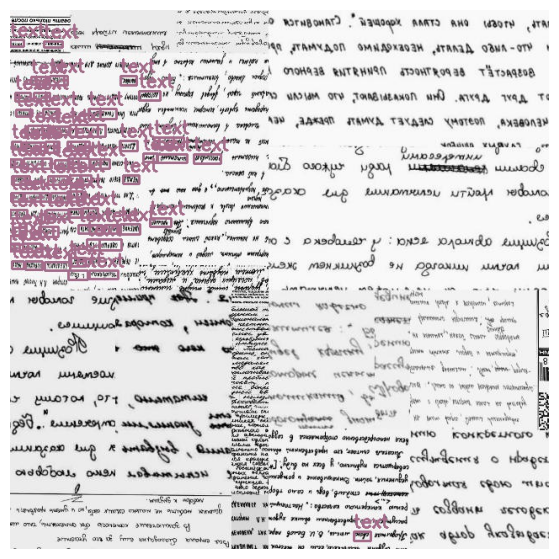

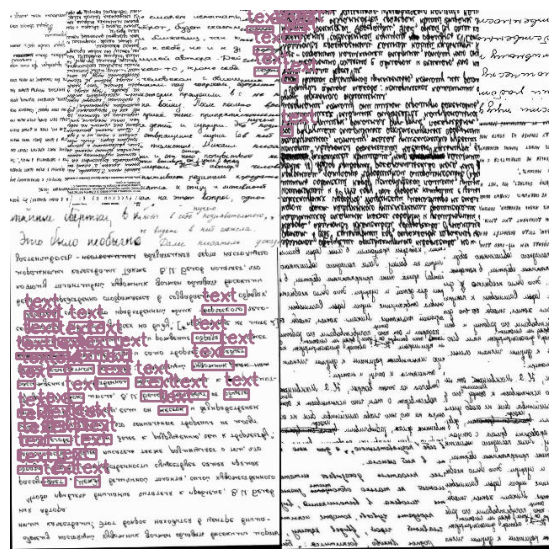

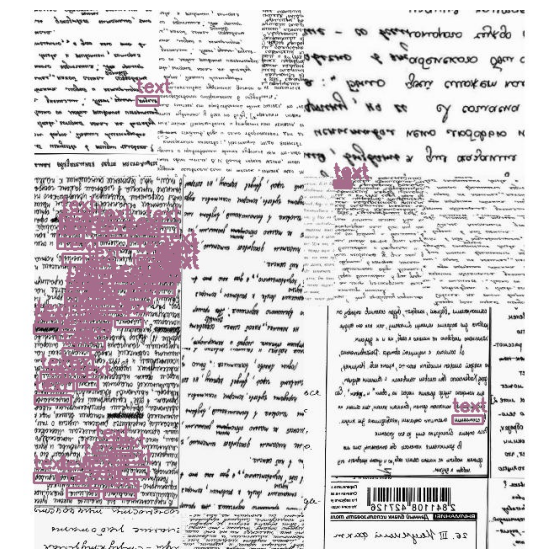

In [10]:
results_dir_path = '/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
!python inference.py --input data/inference_data/image_1.jpg --weights outputs/training/smoke_training/last_model_state.pth

usage: inference.py
       [-h]
       [-i INPUT]
       [--data DATA]
       [-m MODEL]
       [-w WEIGHTS]
       [-th THRESHOLD]
       [-si]
       [-mpl]
       [-d DEVICE]
       [-ims IMGSZ]
       [-nlb]
       [--square-img]
inference.py: error: unrecognized arguments: --/content/drive/MyDrive/text_detection/fasterrcnn-pytorch-training-pipeline/test_image/


Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

In [ ]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2023-07-06 01:41:47.898967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:41:48.907451: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 127/127 [00:00<00:00, 165942.87it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/1

In [ ]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2023-07-06 01:42:38.843655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 01:42:39.900126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 127/127 [00:00<00:00, 285924.11it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 16/1